In [13]:
import numpy as np

In [17]:
class SingleLayer:
  def __init__(self):
    self.w=None
    self.b=None
    self.losses=[] # 손실함수의 결과값을 저장할 리스트

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1.0*err
    return w_grad, b_grad

  def add_bias(self,x):
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=y[i]-a
        w_grad, b_grad=self.backprop(x[i],err)
        self.w+=w_grad
        self.b+=b_grad
        a=np.clip(a,1e-10, 1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)

In [18]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [19]:
cancer.data.shape,cancer.target.shape

((569, 30), (569,))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=cancer.data
y=cancer.target
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)

In [22]:
layer=SingleLayer()
layer.fit(x_train,y_train)

<ipython-input-17-7b6c2cc82f1e>:20: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


In [27]:
layer.score(x_test,y_test)

0.9122807017543859

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

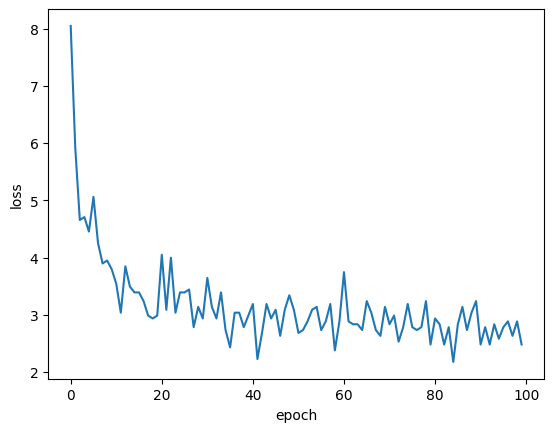

In [29]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [31]:
from sklearn.linear_model import SGDClassifier

In [34]:
sgd=SGDClassifier(loss='log_loss',max_iter=100,tol=1e-3,random_state=42)

In [35]:
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

0.8333333333333334

In [36]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])